In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

Duplicate key in file '/Users/nontawatpattanajak/.matplotlib/matplotlibrc' line #4.


In [2]:
'''
The data has been pre-processed from https://www.kaggle.com/gpreda/covid-world-vaccination-progress
Original source: Our World Data (https://ourworldindata.org)

'''

'\nThe data has been pre-processed from https://www.kaggle.com/gpreda/covid-world-vaccination-progress\nOriginal source: Our World Data (https://ourworldindata.org)\n\n'

# 1. To understand data

In [3]:
#Load data

vaccine_data = pd.read_csv('country_vaccinations.csv')

In [4]:
#See how the data look like

vaccine_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [5]:
#See the latest date of the data

vaccine_data['date'].max()

'2021-04-02'

In [6]:
#Understand a big picture of data

vaccine_data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,5.688000e+03,5.091000e+03,3.551000e+03,4.748000e+03,9.285000e+03,5688.000000,5091.000000,3551.000000,9285.000000
mean,3.176061e+06,2.367437e+06,1.053113e+06,1.106803e+05,6.660192e+04,11.365188,8.457209,4.120817,2827.347119
std,1.181939e+07,7.980747e+06,4.272632e+06,3.991290e+05,2.630405e+05,19.582268,12.977373,8.725780,4964.726524
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.538375e+04,4.150600e+04,1.962800e+04,2.942750e+03,9.700000e+02,0.870000,0.860000,0.420000,361.000000
50%,3.071805e+05,2.691020e+05,1.236860e+05,1.453450e+04,5.913000e+03,4.290000,3.490000,1.580000,1395.000000
75%,1.495076e+06,1.136175e+06,5.389345e+05,6.027850e+04,2.792100e+04,13.032500,9.825000,3.845000,3463.000000
max,1.576065e+08,1.018048e+08,5.798478e+07,7.185000e+06,5.190143e+06,180.780000,95.850000,84.930000,118759.000000


In [7]:
#See counties

list(vaccine_data['country'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Estonia',
 'Faeroe Islands',
 'Falkland Islands',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Isle of Man',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jersey',
 'Jordan',
 'Ka

# 2. What country has the highest progress rate in vaccination programme (Percentage of people who received full doses of vaccine, compared to population of that country)

In [8]:
#Select only interesting data and Process data

vaccined_percentage = vaccine_data[['country', 'date', 'people_fully_vaccinated_per_hundred']]
vaccined_percentage = vaccined_percentage.pivot(index = 'date', columns = 'country', values = 'people_fully_vaccinated_per_hundred')
vaccined_percentage = vaccined_percentage.dropna(how='all', axis=1)
vaccined_percentage = vaccined_percentage.fillna(method='ffill')

In [9]:
#Set threshold to visualise the counties with having more than 20% of population getting full doses of Covid-19 Vaccine

threshold = 20
country_exceed_threshold = []
for country in list(vaccined_percentage.columns):
    if vaccined_percentage[country].iloc[-1] >= threshold:
        country_exceed_threshold.append(country)
vaccined_percentage_selected = vaccined_percentage[country_exceed_threshold]

<Figure size 1008x720 with 0 Axes>

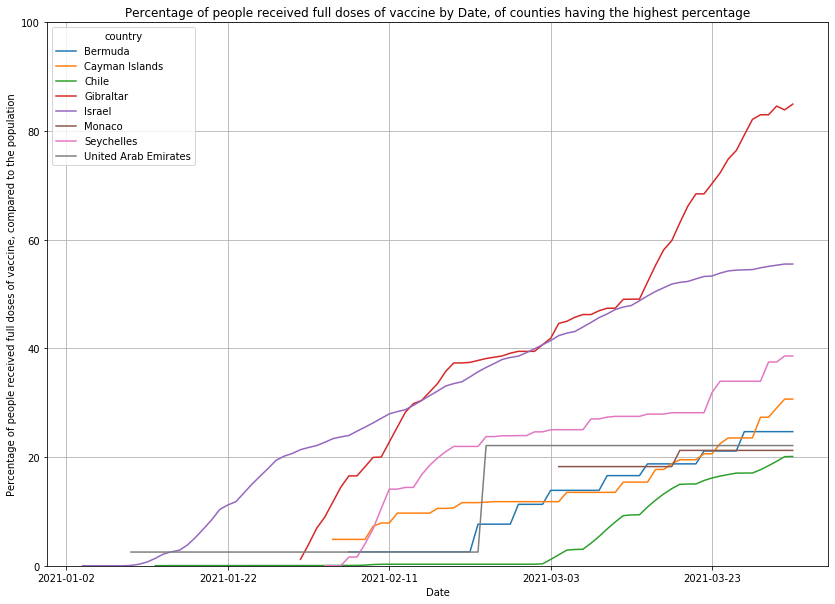

In [10]:
#Visualise the data

plt.rcParams['figure.figsize'] = [14, 10]
plt.figure()
vaccined_percentage_selected.plot()
plt.ylim(0, 100)
plt.ylabel('Percentage of people received full doses of vaccine, compared to the population')
plt.xlabel('Date')
plt.title('Percentage of people received full doses of vaccine by Date, of counties having the highest percentage')
plt.grid(True)

plt.savefig('percentage_full_doses.png')

# To display it in a world map

In [11]:
#Call geopandas

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [12]:
#Process data

vaccine_iso_data = vaccine_data[['iso_code', 'date', 'people_fully_vaccinated_per_hundred']]
vaccine_iso_data = vaccine_iso_data.pivot(index = 'date', columns = 'iso_code', values = 'people_fully_vaccinated_per_hundred')
vaccine_iso_data = vaccine_iso_data.dropna(how='all', axis=1)
vaccine_iso_data = vaccine_iso_data.fillna(method='ffill')

fully_vaccined = pd.DataFrame(vaccine_iso_data.iloc[-1])
column_name = fully_vaccined.columns[0]
fully_vaccined = fully_vaccined.rename(columns = {column_name: 'fully_vaccined_percentage'})

merged = world.merge(fully_vaccined, left_on = 'iso_a3', right_on = 'iso_code', how = 'left')
merged.fillna(value = 0, inplace = True)

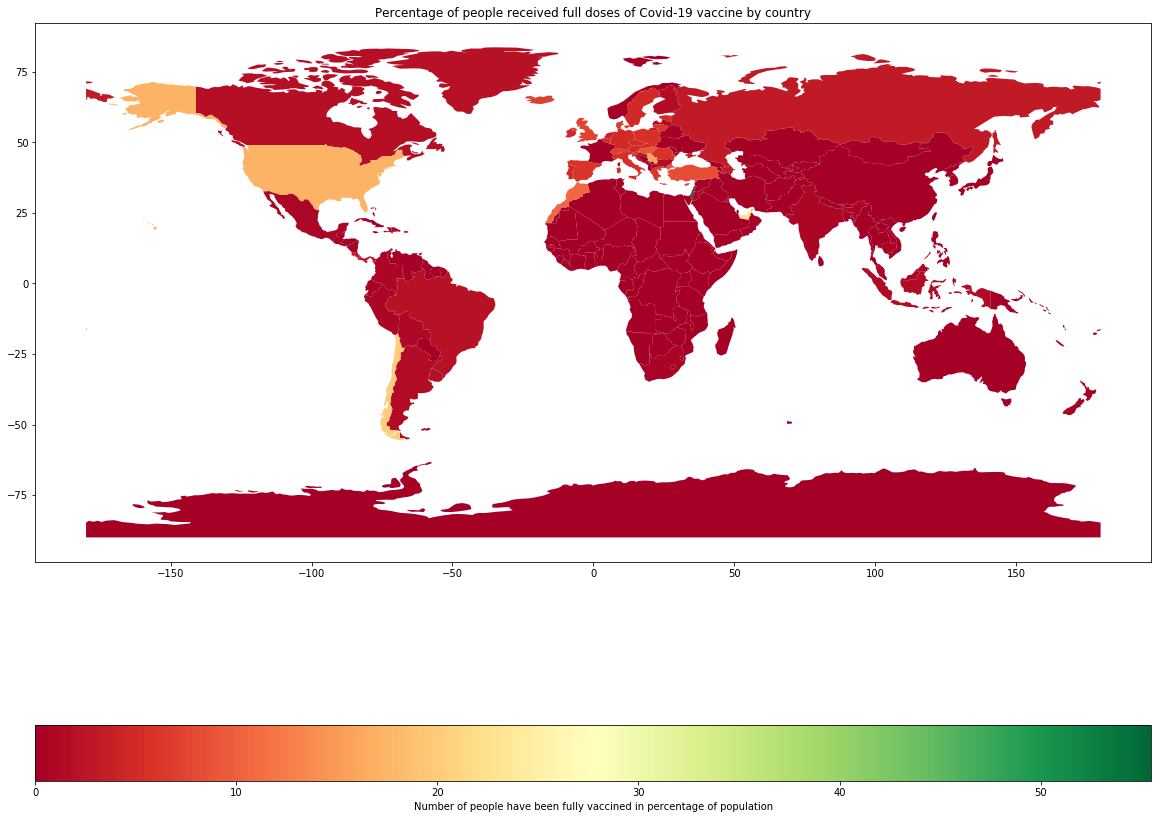

In [13]:
#Visualise data

plt.rcParams['figure.figsize'] = [20, 20]

fig, ax = plt.subplots(1, 1)
plt.title('Percentage of people received full doses of Covid-19 vaccine by country')

merged.plot(column='fully_vaccined_percentage', 
            ax=ax,  
            cmap='RdYlGn', 
            legend=True, 
            edgecolor='black',
            linewidth=0, 
            legend_kwds={'label': "Number of people have been fully vaccined in percentage of population",
                         'orientation': "horizontal"})

plt.savefig('percentage_full_doses_world_map.png', dpi = 600)

# 3. What country has the highest number of vaccination per day

In [14]:
#Process Data

daily_vaccine = vaccine_data[['country', 'date', 'daily_vaccinations']]
daily_vaccine = daily_vaccine.pivot(index = 'date', columns = 'country', values = 'daily_vaccinations')
daily_vaccine = daily_vaccine.dropna(how='all', axis=1)
daily_vaccine = daily_vaccine.fillna(method='ffill')

In [15]:
#Set threshold to see counties with having high rate of vaacination program per day

threshold = 500000
country_exceed_threshold = []
for country in list(daily_vaccine.columns):
    if daily_vaccine[country].iloc[-1] >= threshold:
        country_exceed_threshold.append(country)

daily_vaccine_selected = daily_vaccine[country_exceed_threshold]

<Figure size 1008x720 with 0 Axes>

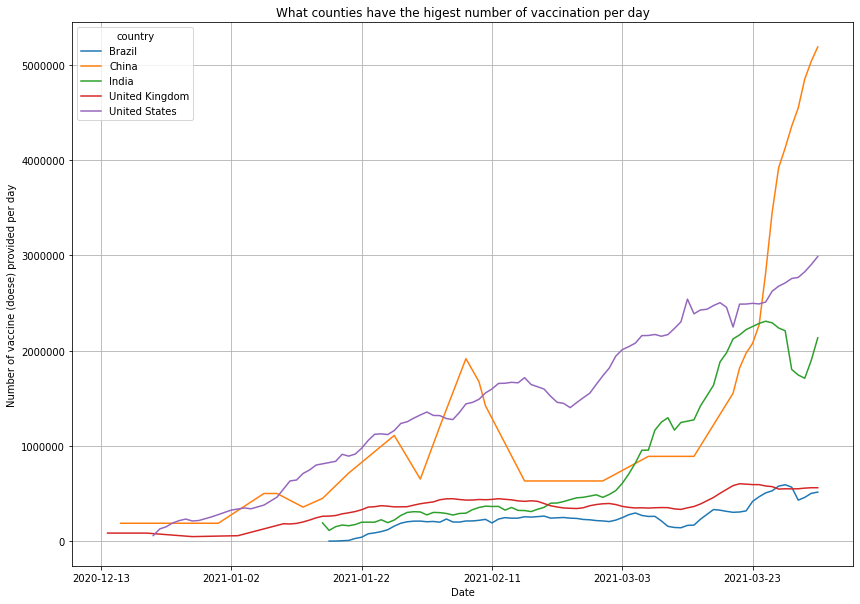

In [16]:
#Visualise data

plt.rcParams['figure.figsize'] = [14, 10]
plt.figure()
daily_vaccine_selected.plot()

plt.ylabel('Number of vaccine (doese) provided per day')
plt.xlabel('Date')
plt.title('What counties have the higest number of vaccination per day')
plt.grid(True)

plt.savefig('countries_with_highest_rate_of_vaccination_programe.png')

# 4. What vaccine brand has been widely used in many countries

In [17]:
# to see raw data of vaccine brands 

vaccine_data['vaccines'].unique()

array(['Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech', 'Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac', 'Sinopharm/Beijing',
       'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'Moderna, Pfizer/BioNTech', 'Moderna',
       'Moderna, Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Covaxin, Oxford/AstraZeneca',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'EpiVacCorona, Sputnik V', 'Johnson&Johnson',
       'Pfizer/BioNTech, Sputnik V',
   

In [18]:
#To clean data to see brand of vaccine

vaccine_brand_raw = list(vaccine_data['vaccines'].unique())

vaccine_brand_list = []
for vaccine in vaccine_brand_raw:
    vaccine = vaccine.replace(' ', '')
    vaccine_list = vaccine.split(',')
    for vaccine_unique in vaccine_list:
        if vaccine_unique not in vaccine_brand_list:
            vaccine_brand_list.append(vaccine_unique)

In [19]:
# Vaccine Brands

vaccine_brand_list

['Oxford/AstraZeneca',
 'Pfizer/BioNTech',
 'SputnikV',
 'Sinopharm/Beijing',
 'Moderna',
 'Sinovac',
 'Sinopharm/Wuhan',
 'Covaxin',
 'EpiVacCorona',
 'Johnson&Johnson']

In [20]:
# to check if there is more than 1 unique information per one country

country = list(vaccine_data['country'].unique())

a = vaccine_data[['country','vaccines']]

many_info = []
for i in country:
    if len(a[a['country'] == i]['vaccines'].unique()) > 1:
        many_info.append(i)

# Expect to see empty list
# This means that each country has only one unique list of vaccine

many_info

[]

In [21]:
#Generate table counties and Vaccine

vaccine_country_data = vaccine_data[['country','vaccines']].groupby(['country']).max()

for column_name in vaccine_brand_list:
    vaccine_country_data[column_name] = ""

In [22]:
#To see table generated

vaccine_country_data

,vaccines,Oxford/AstraZeneca,Pfizer/BioNTech,SputnikV,Sinopharm/Beijing,Moderna,Sinovac,Sinopharm/Wuhan,Covaxin,EpiVacCorona,Johnson&Johnson
country,,,,,,,,,,,
Afghanistan,Oxford/AstraZeneca,,,,,,,,,,
Albania,Pfizer/BioNTech,,,,,,,,,,
Algeria,Sputnik V,,,,,,,,,,
Andorra,Pfizer/BioNTech,,,,,,,,,,
Angola,Oxford/AstraZeneca,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,"Pfizer/BioNTech, Sinovac",,,,,,,,,,
Venezuela,Sputnik V,,,,,,,,,,
Vietnam,Oxford/AstraZeneca,,,,,,,,,,


In [23]:
#Fill vaccine data by counties

for i in range(len(vaccine_country_data)):
    for vaccine_name in vaccine_brand_list:
        if vaccine_name in vaccine_country_data['vaccines'].iloc[i]:
            vaccine_country_data[vaccine_name].iloc[i] = 1
        else:
            vaccine_country_data[vaccine_name].iloc[i] = 0

In [24]:
vaccine_country_data

,vaccines,Oxford/AstraZeneca,Pfizer/BioNTech,SputnikV,Sinopharm/Beijing,Moderna,Sinovac,Sinopharm/Wuhan,Covaxin,EpiVacCorona,Johnson&Johnson
country,,,,,,,,,,,
Afghanistan,Oxford/AstraZeneca,1,0,0,0,0,0,0,0,0,0
Albania,Pfizer/BioNTech,0,1,0,0,0,0,0,0,0,0
Algeria,Sputnik V,0,0,0,0,0,0,0,0,0,0
Andorra,Pfizer/BioNTech,0,1,0,0,0,0,0,0,0,0
Angola,Oxford/AstraZeneca,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,"Pfizer/BioNTech, Sinovac",0,1,0,0,0,1,0,0,0,0
Venezuela,Sputnik V,0,0,0,0,0,0,0,0,0,0
Vietnam,Oxford/AstraZeneca,1,0,0,0,0,0,0,0,0,0


In [25]:
#Process data for visualisation

vaccine_count = pd.DataFrame(vaccine_country_data.sum(axis=0))
vaccine_count = vaccine_count.drop(vaccine_count.index[0], axis = 0)
vaccine_count.rename(columns = {0: 'Number of Countries'}, inplace = True)

<Figure size 1008x720 with 0 Axes>

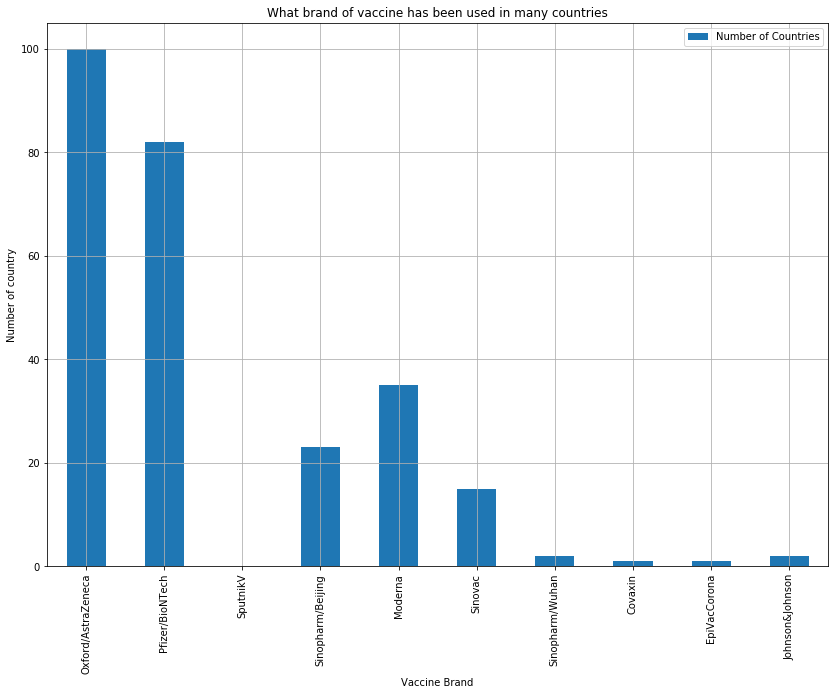

In [26]:
#Visualise Data

plt.figure()
vaccine_count.plot(kind="bar")

plt.ylabel('Number of country')
plt.xlabel('Vaccine Brand')
plt.title('What brand of vaccine has been used in many countries')
plt.grid(True)

plt.savefig('vaccine_used.png')

# 5. What is the progress rate of vaccination programme in 7 counties

In [27]:
#List of counties that would like to see the data

country_list = ['United States', 'United Kingdom', 'Israel', 'United Arab Emirates', 
                'Gibraltar', 'Singapore', 'Thailand']

In [28]:
print('Number of people has been fully vaccinned in percentage of population \n')
for country in country_list:
    print(country + ': ', vaccined_percentage[country].iloc[-1])

Number of people has been fully vaccinned in percentage of population 

United States:  17.34
United Kingdom:  7.29
Israel:  55.51
United Arab Emirates:  22.12
Gibraltar:  84.93
Singapore:  6.42
Thailand:  0.04


In [29]:
print('What vaccine brands have been used \n')
for country in country_list:
    print(country + ': ', vaccine_country_data.loc[country]['vaccines'])

What vaccine brands have been used 

United States:  Johnson&Johnson, Moderna, Pfizer/BioNTech
United Kingdom:  Oxford/AstraZeneca, Pfizer/BioNTech
Israel:  Moderna, Pfizer/BioNTech
United Arab Emirates:  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V
Gibraltar:  Pfizer/BioNTech
Singapore:  Moderna, Pfizer/BioNTech
Thailand:  Oxford/AstraZeneca, Sinovac


In [30]:
print('How many people have been vaccined per day on ' + str(vaccine_data['date'].max()) + '\n')
for country in country_list:
    print(country + ': ', daily_vaccine[country].iloc[-1])

How many people have been vaccined per day on 2021-04-02

United States:  2988825.0
United Kingdom:  560558.0
Israel:  21200.0
United Arab Emirates:  98838.0
Gibraltar:  624.0
Singapore:  35286.0
Thailand:  11830.0


# 6. Oxford/AstraZeneca has been used in what country

In [31]:
#To see what country uses Oxford/AstraZeneca

list(vaccine_country_data[vaccine_country_data['Oxford/AstraZeneca'] == 1].index.values)

['Afghanistan',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Belize',
 'Bhutan',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 "Cote d'Ivoire",
 'Czechia',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'El Salvador',
 'England',
 'Estonia',
 'Falkland Islands',
 'Finland',
 'France',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guyana',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Iraq',
 'Ireland',
 'Isle of Man',
 'Italy',
 'Jamaica',
 'Jersey',
 'Kenya',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malawi',
 'Maldives',
 'Malta',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montserrat',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Netherlands',
 'Nigeria',
 'Northern Cyprus',
 'Northern Ireland',
 'Norway',
 'Oman',
 'Pakistan',
 'Palestine',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Rwanda',
 'Saint Helena',
 'Saint Kitts and Nevis